<a href="https://colab.research.google.com/github/SaitejaVinukonda/abc/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv('cars.csv')
df.head()

,Model_year,Car_model_name,Kms_travelled,Fuel_Type,Transmission,Price in Lakhs,Location
0,2014,Nissan Micra Active Xv,51391,Petrol,Manual,3.24,Bangalore
1,2013,Nissan Terrano Xl (P),101,Petrol,Manual,4.60,Bangalore
2,2018,Nissan Micra Xv Cvt,24353,Petrol,Automatic,4.65,Bangalore
3,2021,Nissan Magnite Xv Dual Tone,9840,Petrol,Manual,7.96,Bangalore
4,2021,Nissan Magnite Xv Premium Turbo,31100,Petrol,Manual,8.31,Bangalore


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model_year      111 non-null    int64  
 1   Car_model_name  111 non-null    object 
 2   Kms_travelled   111 non-null    int64  
 3   Fuel_Type       111 non-null    object 
 4   Transmission    111 non-null    object 
 5   Price in Lakhs  111 non-null    float64
 6   Location        111 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model_year      111 non-null    int64  
 1   Car_model_name  111 non-null    object 
 2   Kms_travelled   111 non-null    int64  
 3   Fuel_Type       111 non-null    object 
 4   Transmission    111 non-null    object 
 5   Price in Lakhs  111 non-null    float64
 6   Location        111 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ KB


In [16]:
pie_data = pd.DataFrame({'Location': (df['Location'].value_counts()).index, 'Count': df['Location'].value_counts()})
pie_data

,Location,Count
Location,,
Ghaziabad,Ghaziabad,17
Gurgaon,Gurgaon,17
New Delhi,New Delhi,17
Noida,Noida,17
Bangalore,Bangalore,13
Hyderabad,Hyderabad,12
Chennai,Chennai,11
Mumbai,Mumbai,7


In [17]:
pie_data['Percentage'] = (pie_data['Count'] / pie_data['Count'].sum()) * 100
pie_data

,Location,Count,Percentage
Location,,,
Ghaziabad,Ghaziabad,17,15.315315
Gurgaon,Gurgaon,17,15.315315
New Delhi,New Delhi,17,15.315315
Noida,Noida,17,15.315315
Bangalore,Bangalore,13,11.711712
Hyderabad,Hyderabad,12,10.810811
Chennai,Chennai,11,9.909910
Mumbai,Mumbai,7,6.306306


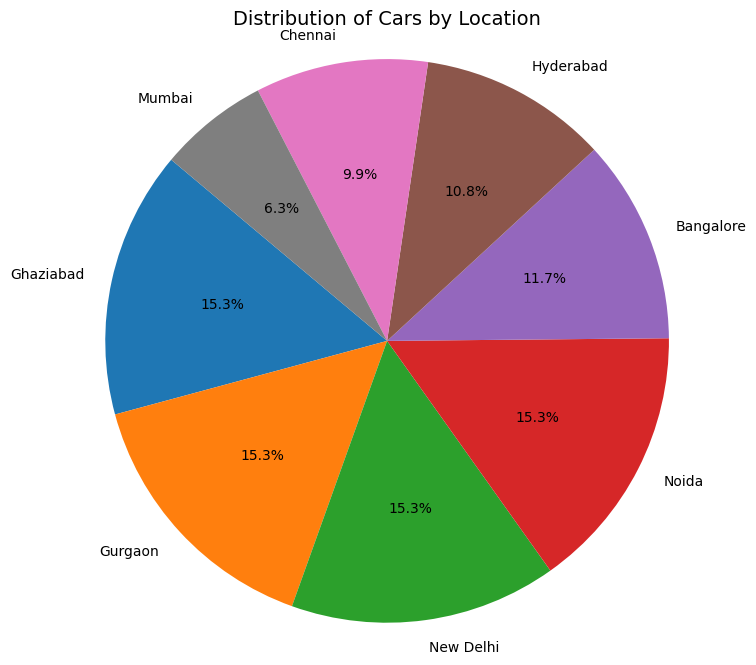

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(df['Location'].value_counts(), labels=df['Location'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cars by Location', fontsize=14)
plt.axis('equal')
plt.show()

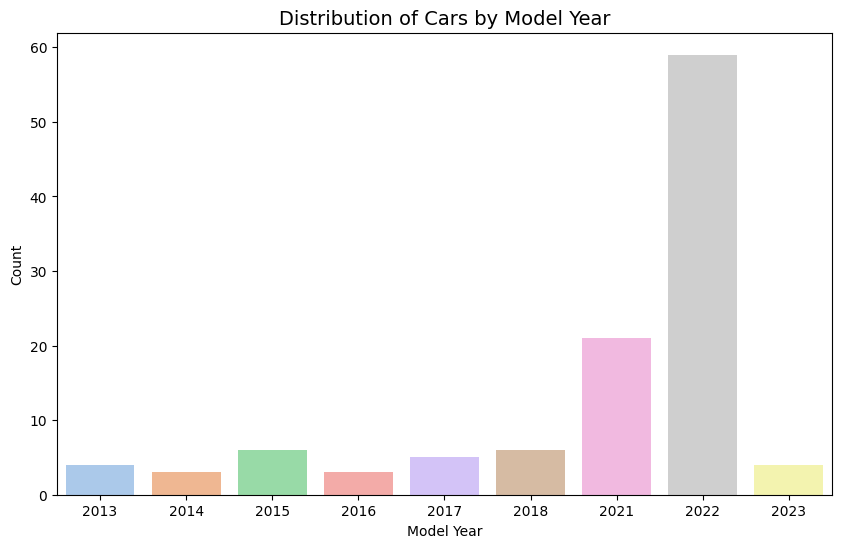

In [19]:
model_year_counts = df['Model_year'].value_counts()
data = {'Model Year': model_year_counts.index, 'Count': model_year_counts.values}
df_plot = pd.DataFrame(data)
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Model Year', y='Count', palette="pastel")
plt.title('Distribution of Cars by Model Year', fontsize=14)
plt.show()

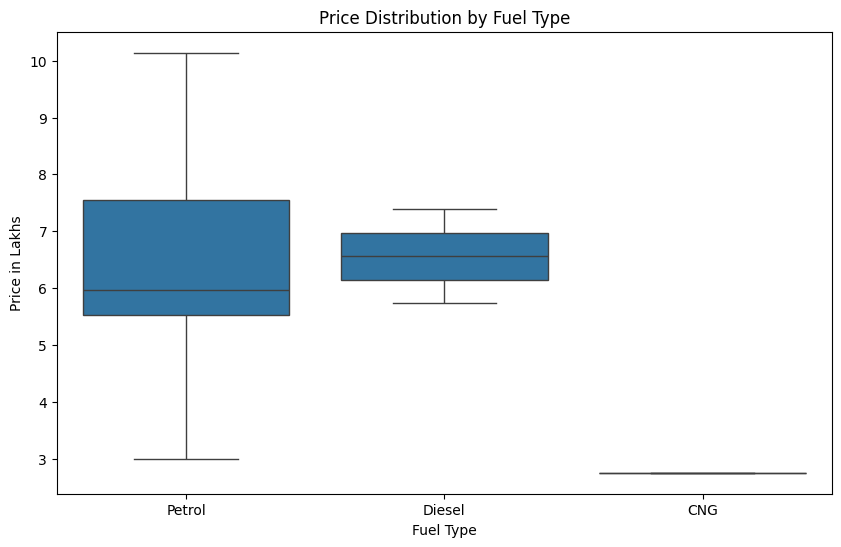

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Price in Lakhs')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price in Lakhs')
plt.show()

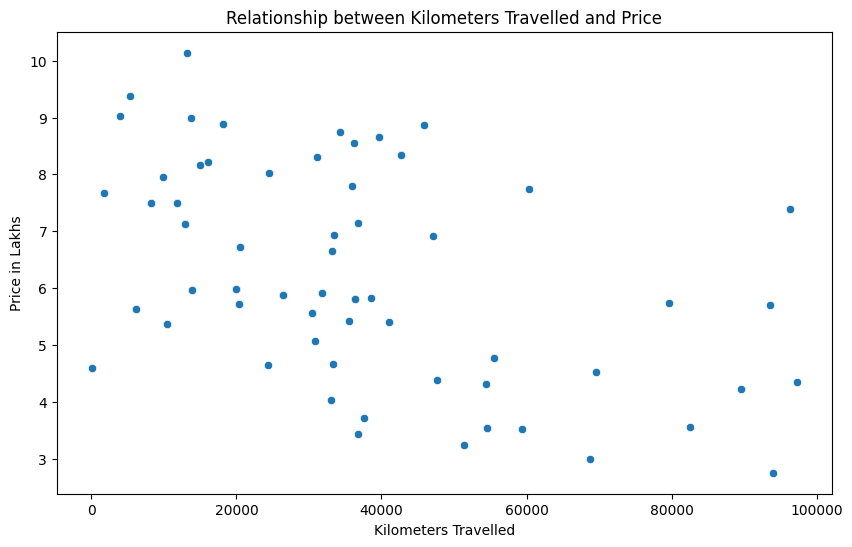

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kms_travelled', y='Price in Lakhs')
plt.title('Relationship between Kilometers Travelled and Price')
plt.xlabel('Kilometers Travelled')
plt.ylabel('Price in Lakhs')
plt.show()

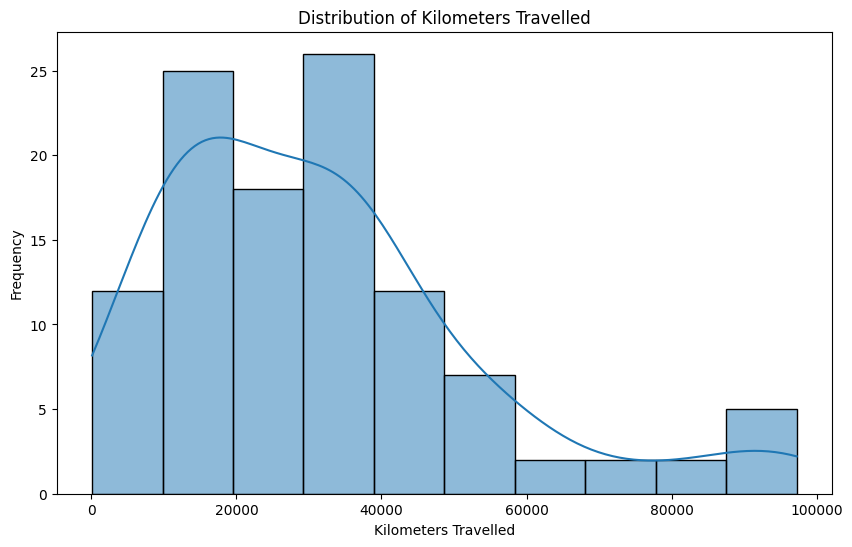

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Kms_travelled'], kde=True) #kde is kernal density estimation
plt.title('Distribution of Kilometers Travelled')
plt.xlabel('Kilometers Travelled')
plt.ylabel('Frequency')
plt.show()

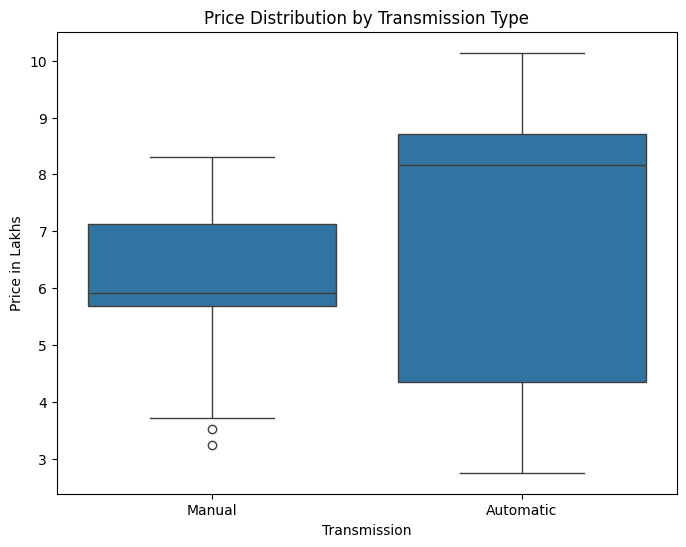

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Transmission', y='Price in Lakhs')
plt.title('Price Distribution by Transmission Type')
plt.ylabel('Price in Lakhs')
plt.show()

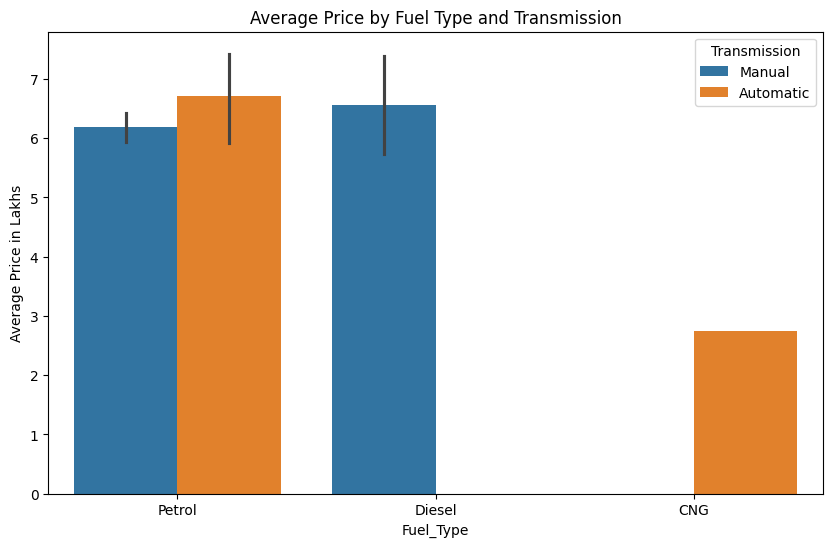

In [24]:
df_filtered = df[df['Fuel_Type'].isin(['Petrol', 'Diesel', 'CNG'])]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='Fuel_Type', y='Price in Lakhs', hue='Transmission')
plt.title('Average Price by Fuel Type and Transmission')
plt.ylabel('Average Price in Lakhs')
plt.show()

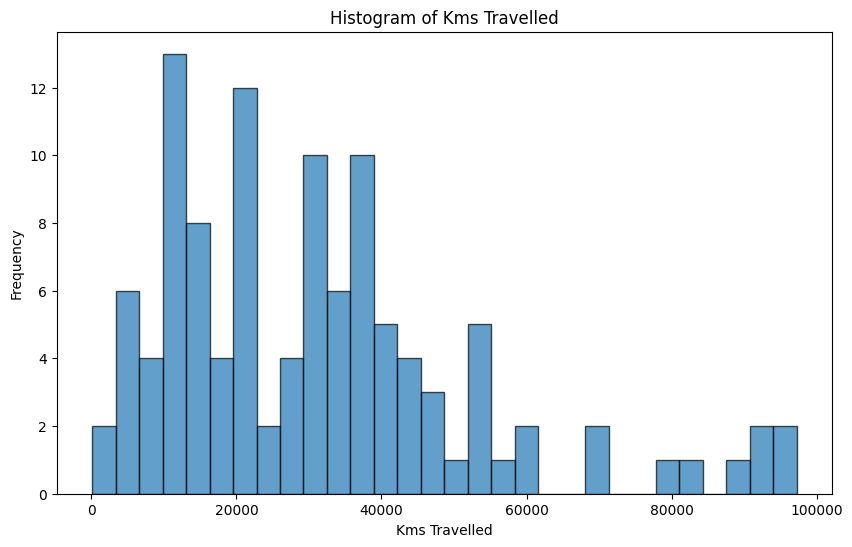

In [25]:
#Histogram for Kms_travelled
plt.figure(figsize=(10, 6))
plt.hist(df['Kms_travelled'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Kms Travelled')
plt.xlabel('Kms Travelled')
plt.ylabel('Frequency')
plt.show()


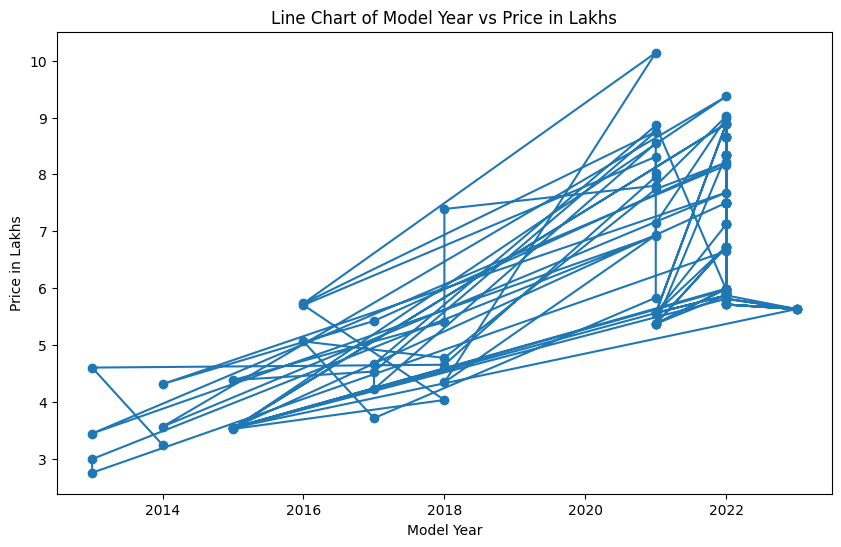

In [26]:
#Line Chart for Model_year vs Price in Lakhs
plt.figure(figsize=(10, 6))
plt.plot(df['Model_year'],df['Price in Lakhs'], marker='o')
plt.title('Line Chart of Model Year vs Price in Lakhs')
plt.xlabel('Model Year')
plt.ylabel('Price in Lakhs')
plt.show()

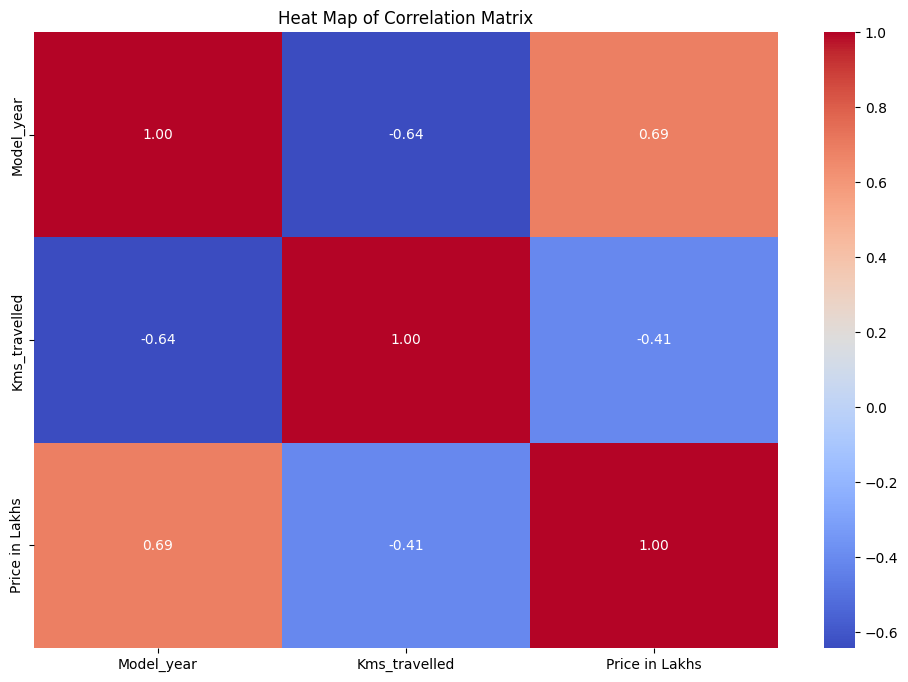

In [10]:
#Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
# Heat Map of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heat Map of Correlation Matrix')
plt.show()